# 2019년 수입액 예측

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [3]:
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kotra/공모전데이터_분석용_KOTRA_0525.csv')
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kotra/공모전데이터_예측용_KOTRA_0525.csv')

In [4]:
train_df

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
0,2017,190590,12,Algeria,46052990973,19480986257,30.0,3878.238437,170163165961,159994837855,41389198,110.973017,46.109810,9954.009766,3.416326e+06,7657
1,2017,190590,36,Australia,228441691195,19480986257,0.0,12203.155980,1329188475752,1208846993740,24601860,1.304758,80.223690,8329.652344,4.387470e+08,5294788
2,2017,190590,40,Austria,166475020975,19480986257,0.0,4403.247293,417237869116,395568644341,8797566,NaN,78.856460,8289.029297,4.532064e+08,335818
3,2017,190590,56,Belgium,406412223480,19480986257,0.0,3980.375563,502698069367,475739588765,11375158,NaN,72.409200,8722.114258,7.065245e+08,173709
4,2017,190590,76,Brazil,150749493921,19480986257,18.0,9644.206941,2062831045936,1795700168991,207833831,3.191389,55.382403,18364.505860,3.132965e+07,122850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21184,2017,852852,784,United Arab Emirates,270954907547,18327708223,NaN,5643.250737,385605506855,357045064670,9487203,3.672500,77.434350,6909.236328,2.056493e+08,881214
21185,2017,852852,792,Turkey,233799651234,18327708223,NaN,4123.461111,858988610574,869683121563,81101892,3.648133,69.378820,7967.700684,1.330809e+08,9545535
21186,2017,852852,818,Egypt,66338749061,18327708223,NaN,NaN,235733695652,332441717791,96442593,17.782534,55.474280,8497.368164,NaN,1313545
21187,2017,852852,826,United Kingdom,641332371112,18327708223,NaN,4071.487776,2666229179958,2694283209613,66058859,0.776977,83.341080,8875.389648,1.142794e+09,19876811


In [5]:
train_df.describe()

,UNC_YEAR,HSCD,COUNTRYCD,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
count,21189.0,21189.000000,21189.00000,2.118900e+04,2.118900e+04,21060.000000,21167.000000,2.118900e+04,2.118900e+04,2.118900e+04,17701.000000,21189.000000,21189.000000,2.116800e+04,2.118900e+04
mean,2017.0,736897.468120,450.41111,3.424906e+11,1.516928e+10,3.271472,6368.110474,1.644687e+12,1.547985e+12,1.225087e+08,1993.842026,70.723435,7951.616743,3.083345e+08,1.793963e+07
std,0.0,201427.725252,254.19937,4.639194e+11,3.915677e+10,8.699236,2518.061371,3.433912e+12,3.257228e+12,2.844419e+08,6568.366701,10.562132,4054.057558,2.130044e+09,4.810033e+08
min,2017.0,190219.000000,12.00000,4.337305e+09,2.436821e+08,0.000000,1172.047241,1.142576e+10,1.118673e+10,3.113779e+06,0.303350,42.671390,955.651062,7.630000e+02,0.000000e+00
25%,2017.0,640419.000000,203.00000,6.633875e+10,2.469927e+09,0.000000,4376.303156,2.357337e+11,2.504401e+11,1.137516e+07,3.191389,64.528933,4692.671875,1.032367e+07,4.917000e+04
50%,2017.0,843131.000000,458.00000,2.132153e+11,4.849947e+09,0.000000,5624.930017,4.453453e+11,4.179836e+11,3.797483e+07,7.793250,73.394083,8262.062500,4.082173e+07,3.496490e+05
75%,2017.0,853329.000000,699.00000,4.324051e+11,1.188559e+10,5.000000,7877.524947,1.574199e+12,1.276787e+12,9.459664e+07,110.973017,78.272910,9954.009766,1.456395e+08,2.307592e+06
max,2017.0,999999.000000,842.00000,2.405277e+12,3.937064e+11,515.000000,15134.164110,1.951935e+13,1.871496e+13,1.386395e+09,33226.298150,87.166330,18375.181640,1.130730e+11,6.369533e+10


In [6]:
test_df

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
0,2018,190590,12,Algeria,42196119729,2.223464e+10,27.0,3735.047389,175405660377,170163165961,42228429.0,100.691433,46.22686,9954.009766,6.788998e+06,NaN
1,2018,190590,36,Australia,240422685574,2.223464e+10,1.2,11947.511360,1432881172002,1329188475752,24982688.0,1.035843,80.76007,8329.652344,4.825606e+08,NaN
2,2018,190590,40,Austria,186965232670,2.223464e+10,2.8,4005.020029,455094861902,417237869116,8840521.0,NaN,78.70694,8289.029297,4.999259e+08,NaN
3,2018,190590,56,Belgium,461444842911,2.223464e+10,2.8,4501.782826,543734366831,502698069367,11427054.0,NaN,72.18146,8722.114258,7.691014e+08,NaN
4,2018,190590,76,Brazil,185290138433,2.223464e+10,17.1,10015.769070,1885482534238,2062831045936,209469333.0,2.156089,55.80145,18364.505860,4.081729e+07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21184,2018,852852,784,United Arab Emirates,254510973245,2.092602e+10,NaN,5404.902374,422215043585,385605506855,9630959.0,3.672500,79.30036,6909.236328,1.962898e+08,NaN
21185,2018,852852,792,Turkey,234394880098,2.092602e+10,NaN,3810.711560,778381859841,858988610574,82319724.0,1.903768,70.91450,7967.700684,1.115959e+08,NaN
21186,2018,852852,818,Egypt,94326188483,2.092602e+10,NaN,4064.977456,249712999437,235733695652,98423595.0,6.870325,55.79763,8497.368164,3.436343e+07,NaN
21187,2018,852852,826,United Kingdom,723877103929,2.092602e+10,NaN,4402.897106,2860667727552,2666229179958,66460344.0,0.639661,83.21535,8875.389648,1.238732e+09,NaN


In [7]:
test_df.describe()

,UNC_YEAR,HSCD,COUNTRYCD,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
count,21189.0,21189.000000,21189.00000,2.118900e+04,2.118900e+04,20564.000000,21186.000000,2.118900e+04,2.118900e+04,2.118900e+04,17701.000000,21189.000000,21189.000000,2.118600e+04,0.0
mean,2018.0,736897.468120,450.41111,3.843218e+11,1.704633e+10,4.389127,6421.839852,1.750770e+12,1.644687e+12,1.234797e+08,1449.668518,71.336974,7951.616743,3.369806e+08,NaN
std,0.0,201427.725252,254.19937,5.210679e+11,4.529307e+10,8.426212,2571.515373,3.685611e+12,3.433912e+12,2.865277e+08,4687.373483,10.304985,4054.057558,2.377977e+09,NaN
min,2018.0,190219.000000,12.00000,6.125977e+09,3.012275e+08,0.000000,1058.383504,1.310877e+10,1.142576e+10,3.170208e+06,0.283583,42.974820,955.651062,4.145000e+03,NaN
25%,2018.0,640419.000000,203.00000,9.282130e+10,2.802883e+09,0.000000,4333.182133,2.497130e+11,2.357337e+11,1.142705e+07,1.903768,65.204853,4692.671875,1.146273e+07,NaN
50%,2018.0,843131.000000,458.00000,2.343949e+11,5.417171e+09,1.500000,5635.271340,4.550949e+11,4.453453e+11,3.797475e+07,6.870325,73.429480,8262.062500,4.459327e+07,NaN
75%,2018.0,853329.000000,699.00000,4.734418e+11,1.334556e+10,5.000000,8000.268487,1.669583e+12,1.574199e+12,9.554040e+07,97.595658,78.772040,9954.009766,1.587431e+08,NaN
max,2018.0,999999.000000,842.00000,2.629608e+12,4.810890e+11,504.900000,15313.671040,2.058016e+13,1.951935e+13,1.392730e+09,20933.416670,87.022130,18375.181640,1.274310e+11,NaN


## Imports of goods and services 변수 추가

In [8]:
im_2017 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kotra/2017im.csv')
im_2018 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kotra/2018im.csv')

In [9]:
im_2017

,index,Series_Code,Country_Name,2017
0,0,NE.IMP.GNFS.ZS,Afghanistan,..
1,1,NE.IMP.GNFS.ZS,Albania,46.62445444
2,2,NE.IMP.GNFS.ZS,Algeria,32.68912917
3,3,NE.IMP.GNFS.ZS,American Samoa,102.2875817
4,4,NE.IMP.GNFS.ZS,Andorra,..
...,...,...,...,...
212,212,NE.IMP.GNFS.ZS,Virgin Islands (U.S.),90.57282302
213,213,NE.IMP.GNFS.ZS,West Bank and Gaza,52.72445437
214,214,NE.IMP.GNFS.ZS,"Yemen, Rep.",..
215,215,NE.IMP.GNFS.ZS,Zambia,36.59283689


In [10]:
im_2018

,index,Series_Code,Country_Name,2018
0,0,NE.IMP.GNFS.ZS,Afghanistan,..
1,1,NE.IMP.GNFS.ZS,Albania,45.26431362
2,2,NE.IMP.GNFS.ZS,Algeria,32.11179183
3,3,NE.IMP.GNFS.ZS,American Samoa,103.276131
4,4,NE.IMP.GNFS.ZS,Andorra,..
...,...,...,...,...
212,212,NE.IMP.GNFS.ZS,Virgin Islands (U.S.),101.4809237
213,213,NE.IMP.GNFS.ZS,West Bank and Gaza,55.439711
214,214,NE.IMP.GNFS.ZS,"Yemen, Rep.",..
215,215,NE.IMP.GNFS.ZS,Zambia,36.93089354


In [11]:
im_2017.drop(['index'], axis=1, inplace=True)
im_2017.head()

,Series_Code,Country_Name,2017
0,NE.IMP.GNFS.ZS,Afghanistan,..
1,NE.IMP.GNFS.ZS,Albania,46.62445444
2,NE.IMP.GNFS.ZS,Algeria,32.68912917
3,NE.IMP.GNFS.ZS,American Samoa,102.2875817
4,NE.IMP.GNFS.ZS,Andorra,..


In [12]:
im_2018.drop(['index'], axis=1, inplace=True)
im_2018.head()

,Series_Code,Country_Name,2018
0,NE.IMP.GNFS.ZS,Afghanistan,..
1,NE.IMP.GNFS.ZS,Albania,45.26431362
2,NE.IMP.GNFS.ZS,Algeria,32.11179183
3,NE.IMP.GNFS.ZS,American Samoa,103.276131
4,NE.IMP.GNFS.ZS,Andorra,..


In [13]:
train_df = pd.merge(train_df, im_2017, how='left', left_on='COUNTRYNM', right_on='Country_Name')
train_df.rename(columns={"2017": "Imports of goods and services (% of GDP)"}, inplace=True)
train_df.drop(['Series_Code', 'Country_Name'], axis=1, inplace=True)
train_df

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,Imports of goods and services (% of GDP)
0,2017,190590,12,Algeria,46052990973,19480986257,30.0,3878.238437,170163165961,159994837855,41389198,110.973017,46.109810,9954.009766,3.416326e+06,7657,32.68912917
1,2017,190590,36,Australia,228441691195,19480986257,0.0,12203.155980,1329188475752,1208846993740,24601860,1.304758,80.223690,8329.652344,4.387470e+08,5294788,20.61296969
2,2017,190590,40,Austria,166475020975,19480986257,0.0,4403.247293,417237869116,395568644341,8797566,NaN,78.856460,8289.029297,4.532064e+08,335818,50.89052331
3,2017,190590,56,Belgium,406412223480,19480986257,0.0,3980.375563,502698069367,475739588765,11375158,NaN,72.409200,8722.114258,7.065245e+08,173709,82.1434261
4,2017,190590,76,Brazil,150749493921,19480986257,18.0,9644.206941,2062831045936,1795700168991,207833831,3.191389,55.382403,18364.505860,3.132965e+07,122850,11.8007665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21184,2017,852852,784,United Arab Emirates,270954907547,18327708223,NaN,5643.250737,385605506855,357045064670,9487203,3.672500,77.434350,6909.236328,2.056493e+08,881214,75.40941203
21185,2017,852852,792,Turkey,233799651234,18327708223,NaN,4123.461111,858988610574,869683121563,81101892,3.648133,69.378820,7967.700684,1.330809e+08,9545535,29.72274641
21186,2017,852852,818,Egypt,66338749061,18327708223,NaN,NaN,235733695652,332441717791,96442593,17.782534,55.474280,8497.368164,NaN,1313545,29.30835735
21187,2017,852852,826,United Kingdom,641332371112,18327708223,NaN,4071.487776,2666229179958,2694283209613,66058859,0.776977,83.341080,8875.389648,1.142794e+09,19876811,31.55310169


In [14]:
test_df = pd.merge(test_df, im_2018, how='left', left_on='COUNTRYNM', right_on='Country_Name')
test_df.rename(columns={"2018": "Imports of goods and services (% of GDP)"}, inplace=True)
test_df.drop(['Series_Code', 'Country_Name'], axis=1, inplace=True)
test_df

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,Imports of goods and services (% of GDP)
0,2018,190590,12,Algeria,42196119729,2.223464e+10,27.0,3735.047389,175405660377,170163165961,42228429.0,100.691433,46.22686,9954.009766,6.788998e+06,NaN,32.11179183
1,2018,190590,36,Australia,240422685574,2.223464e+10,1.2,11947.511360,1432881172002,1329188475752,24982688.0,1.035843,80.76007,8329.652344,4.825606e+08,NaN,21.44074306
2,2018,190590,40,Austria,186965232670,2.223464e+10,2.8,4005.020029,455094861902,417237869116,8840521.0,NaN,78.70694,8289.029297,4.999259e+08,NaN,52.41986954
3,2018,190590,56,Belgium,461444842911,2.223464e+10,2.8,4501.782826,543734366831,502698069367,11427054.0,NaN,72.18146,8722.114258,7.691014e+08,NaN,83.2593168
4,2018,190590,76,Brazil,185290138433,2.223464e+10,17.1,10015.769070,1885482534238,2062831045936,209469333.0,2.156089,55.80145,18364.505860,4.081729e+07,NaN,14.24120388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21184,2018,852852,784,United Arab Emirates,254510973245,2.092602e+10,NaN,5404.902374,422215043585,385605506855,9630959.0,3.672500,79.30036,6909.236328,1.962898e+08,NaN,66.68065074
21185,2018,852852,792,Turkey,234394880098,2.092602e+10,NaN,3810.711560,778381859841,858988610574,82319724.0,1.903768,70.91450,7967.700684,1.115959e+08,NaN,31.34254384
21186,2018,852852,818,Egypt,94326188483,2.092602e+10,NaN,4064.977456,249712999437,235733695652,98423595.0,6.870325,55.79763,8497.368164,3.436343e+07,NaN,29.36629558
21187,2018,852852,826,United Kingdom,723877103929,2.092602e+10,NaN,4402.897106,2860667727552,2666229179958,66460344.0,0.639661,83.21535,8875.389648,1.238732e+09,NaN,32.08005259


## 데이터 전처리

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

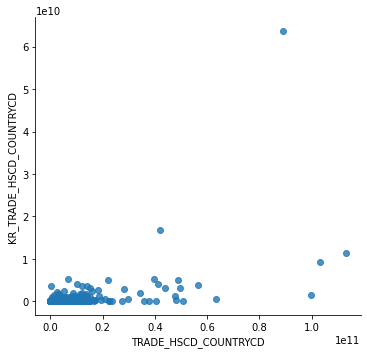

In [15]:
plt.figure()
otl = sns.lmplot("TRADE_HSCD_COUNTRYCD","KR_TRADE_HSCD_COUNTRYCD",data=train_df,
                fit_reg=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


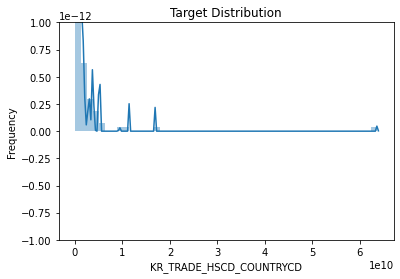

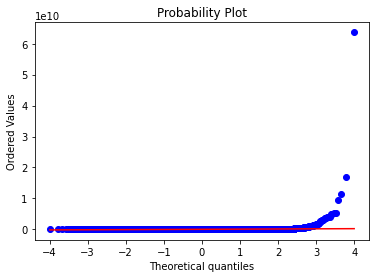

Skewness: 112.976


In [16]:
# 타깃값 분포
sns.distplot(train_df['KR_TRADE_HSCD_COUNTRYCD'])
plt.title('Target Distribution')
plt.ylabel('Frequency')
plt.figure()
#타깃값의 왜도값
qq = stats.probplot(np.array(train_df['KR_TRADE_HSCD_COUNTRYCD']), plot=plt)
plt.show()
print("Skewness: {:.3f}".format(train_df['KR_TRADE_HSCD_COUNTRYCD'].skew()))

In [17]:
#타겟에 대한 로그 변환 취하기
#log1p
train_df['KR_TRADE_HSCD_COUNTRYCD'] = np.log1p(train_df['KR_TRADE_HSCD_COUNTRYCD'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


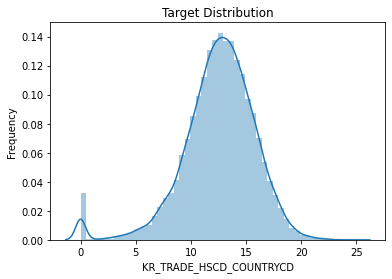

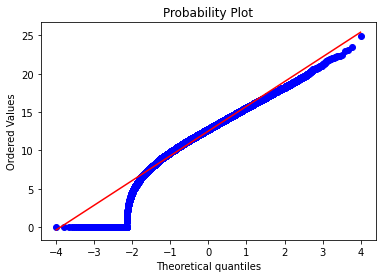

Skewness: -0.908


In [18]:
sns.distplot(train_df['KR_TRADE_HSCD_COUNTRYCD'])
plt.title('Target Distribution')
plt.ylabel('Frequency')

plt.figure()
qq = stats.probplot(np.array(train_df['KR_TRADE_HSCD_COUNTRYCD']), plot=plt)
plt.show()

print("Skewness: {:.3f}".format(train_df['KR_TRADE_HSCD_COUNTRYCD'].skew()))

In [19]:
print(train_df['COUNTRYNM'].unique())
print(train_df['COUNTRYCD'].unique())
print(train_df['COUNTRYNM'].nunique())
print(train_df['COUNTRYCD'].nunique())

['Algeria' 'Australia' 'Austria' 'Belgium' 'Brazil' 'Myanmar' 'Canada'
 'Sri Lanka' 'Chile' 'China' 'Czechia' 'France' 'Germany' 'Guatemala'
 'China, Hong Kong SAR' 'Indonesia' 'Iran' 'Italy' 'Japan' 'Kazakhstan'
 'Kuwait' 'Malaysia' 'Mexico' 'Mongolia' 'Netherlands' 'New Zealand'
 'Norway' 'Peru' 'Philippines' 'Poland' 'Russian Federation'
 'Saudi Arabia' 'India' 'Singapore' 'Viet Nam' 'South Africa' 'Spain'
 'Switzerland' 'United Arab Emirates' 'Turkey' 'Egypt' 'United Kingdom'
 'USA']
[ 12  36  40  56  76 104 124 144 152 156 203 251 276 320 344 360 364 381
 392 398 414 458 484 496 528 554 579 604 608 616 643 682 699 702 704 710
 724 757 784 792 818 826 842]
43
43


In [20]:
print(train_df['HSCD'].unique())
print(train_df['HSCD'].nunique())

[190590 190230 190219 591190 590390 550320 540769 540761 540752 292910
 271019 210690 210390 491199 491110 491000 490199 490110 482390 482190
 482110 482010 481940 481920 481910 481890 481820 481141 420299 420292
 420232 420212 401699 401693 401691 401610 401390 401310 401290 401120
 401110 401039 401035 401032 401031 401019 400942 400941 400932 400931
 400922 400912 400911 392690 392630 392620 392610 392590 392490 392410
 392390 392350 392330 392329 392321 392310 392190 392119 392099 392049
 392020 392010 391990 391910 391810 391740 391739 391732 391729 391239
 391000 390730 390720 390690 390230 390210 390120 390110 382200 381400
 350699 350691 350610 340700 340319 340290 340220 330790 330590 330510
 330499 330491 330430 330420 330410 321590 321519 321511 320890 300640
 300610 300590 300510 300490 761699 761510 741999 741220 732690 732399
 732393 732111 732090 732020 731829 731824 731822 731821 731819 731816
 731815 731589 731512 731511 731290 731210 730890 730799 730792 730791
 73072

In [21]:
#년도, 국가명 제거
#국가코드는 국가명이랑 중복된 정보이므로 제거
train_df.drop(['UNC_YEAR', 'COUNTRYCD'], axis=1, inplace=True)
test_df.drop(['UNC_YEAR', 'COUNTRYCD'], axis=1, inplace=True)

In [22]:
#정답지 분리
target_df = pd.DataFrame(train_df["KR_TRADE_HSCD_COUNTRYCD"], columns=["KR_TRADE_HSCD_COUNTRYCD"])
train_df.drop("KR_TRADE_HSCD_COUNTRYCD", axis=1, inplace=True)
test_df.drop("KR_TRADE_HSCD_COUNTRYCD", axis=1, inplace=True)

print('dimension of the train:' , train_df.shape)
print('dimension of the test:' , test_df.shape)

dimension of the train: (21189, 14)
dimension of the test: (21189, 14)


In [23]:
# train/test 합치기...
df = pd.concat([train_df,test_df]).reset_index()

df.drop(['index'], axis=1, inplace=True)

In [24]:
print('dim of the dataset:' , df.shape)
df.head()

dim of the dataset: (42378, 14)


,HSCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,Imports of goods and services (% of GDP)
0,190590,Algeria,46052990973,1.948099e+10,30.0,3878.238437,170163165961,159994837855,41389198.0,110.973017,46.109810,9954.009766,3416326.0,32.68912917
1,190590,Australia,228441691195,1.948099e+10,0.0,12203.155980,1329188475752,1208846993740,24601860.0,1.304758,80.223690,8329.652344,438747025.0,20.61296969
2,190590,Austria,166475020975,1.948099e+10,0.0,4403.247293,417237869116,395568644341,8797566.0,NaN,78.856460,8289.029297,453206357.0,50.89052331
3,190590,Belgium,406412223480,1.948099e+10,0.0,3980.375563,502698069367,475739588765,11375158.0,NaN,72.409200,8722.114258,706524512.0,82.1434261
4,190590,Brazil,150749493921,1.948099e+10,18.0,9644.206941,2062831045936,1795700168991,207833831.0,3.191389,55.382403,18364.505860,31329648.0,11.8007665


## Feature Engineering
### 결측값 처리

In [25]:
mc = pd.DataFrame(df.isnull().sum(), columns=["Missing Count"])
mc = mc[mc['Missing Count']!=0] #불리언 인덱싱
#새로운 컬럼 추가
mc['Missing %'] = (mc['Missing Count'] / df.shape[0]) * 100
mc.sort_values('Missing %',ascending=False)

,Missing Count,Missing %
PA_NUS_FCRF,6976,16.461371
TARIFF_AVG,754,1.779225
SNDIST,25,0.058993
TRADE_HSCD_COUNTRYCD,24,0.056633


In [26]:
df.describe()

,HSCD,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD
count,42378.000000,4.237800e+04,4.237800e+04,41624.000000,42353.000000,4.237800e+04,4.237800e+04,4.237800e+04,35402.000000,42378.000000,42378.000000,4.235400e+04
mean,736897.468120,3.634062e+11,1.610781e+10,3.823640,6394.987215,1.697729e+12,1.596336e+12,1.229942e+08,1721.755272,71.030205,7951.616743,3.226636e+08
std,201425.348622,4.937593e+11,4.234615e+10,8.583544,2545.052459,3.562338e+12,3.347046e+12,2.854837e+08,5712.317329,10.438736,4054.009725,2.257488e+09
min,190219.000000,4.337305e+09,2.436821e+08,0.000000,1058.383504,1.142576e+10,1.118673e+10,3.113779e+06,0.283583,42.671390,955.651062,7.630000e+02
25%,640419.000000,7.590327e+10,2.660083e+09,0.000000,4354.145395,2.489087e+11,2.357337e+11,1.142705e+07,2.156089,64.528933,4692.671875,1.091331e+07
50%,843131.000000,2.217351e+11,5.154978e+09,0.400000,5629.172618,4.550949e+11,4.453453e+11,3.797475e+07,7.756000,73.429480,8262.062500,4.284284e+07
75%,853329.000000,4.500755e+11,1.262942e+10,5.000000,7942.825182,1.574199e+12,1.329188e+12,9.459664e+07,100.691433,78.706940,9954.009766,1.524308e+08
max,999999.000000,2.629608e+12,4.810890e+11,515.000000,15313.671040,2.058016e+13,1.951935e+13,1.392730e+09,33226.298150,87.166330,18375.181640,1.274310e+11


In [27]:
#전체 데이터에서 0값을 가진 TARIFF_AVG의 비율
tariff = df[df['TARIFF_AVG'] == 0]
(len(tariff.index) / df.shape[0]) * 100

46.502902449384116

In [28]:
#결측값 처리 어떻게 할지 다시 고민 필요
df['PA_NUS_FCRF'] = df['PA_NUS_FCRF'].interpolate(method = 'linear' , limit_direction = 'forward')
df['TARIFF_AVG'] = df['TARIFF_AVG'].fillna(df['TARIFF_AVG'].min())
df['SNDIST'] = df['SNDIST'].fillna(df['SNDIST'].min())
df['TRADE_HSCD_COUNTRYCD'] = df['TRADE_HSCD_COUNTRYCD'].fillna(df['TRADE_HSCD_COUNTRYCD'].min())

In [29]:
df.describe()

,HSCD,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD
count,42378.000000,4.237800e+04,4.237800e+04,42378.000000,42378.000000,4.237800e+04,4.237800e+04,4.237800e+04,42378.000000,42378.000000,42378.000000,4.237800e+04
mean,736897.468120,3.634062e+11,1.610781e+10,3.755609,6391.838999,1.697729e+12,1.596336e+12,1.229942e+08,1749.049896,71.030205,7951.616743,3.224809e+08
std,201425.348622,4.937593e+11,4.234615e+10,8.521843,2547.599273,3.562338e+12,3.347046e+12,2.854837e+08,5531.499535,10.438736,4054.009725,2.256862e+09
min,190219.000000,4.337305e+09,2.436821e+08,0.000000,1058.383504,1.142576e+10,1.118673e+10,3.113779e+06,0.283583,42.671390,955.651062,7.630000e+02
25%,640419.000000,7.590327e+10,2.660083e+09,0.000000,4352.820569,2.489087e+11,2.357337e+11,1.142705e+07,2.562512,64.528933,4692.671875,1.088573e+07
50%,843131.000000,2.217351e+11,5.154978e+09,0.300000,5626.726265,4.550949e+11,4.453453e+11,3.797475e+07,7.793250,73.429480,8262.062500,4.276978e+07
75%,853329.000000,4.500755e+11,1.262942e+10,5.000000,7941.365378,1.574199e+12,1.329188e+12,9.459664e+07,100.691433,78.706940,9954.009766,1.522847e+08
max,999999.000000,2.629608e+12,4.810890e+11,515.000000,15313.671040,2.058016e+13,1.951935e+13,1.392730e+09,33226.298150,87.166330,18375.181640,1.274310e+11


In [30]:
target_df.describe()

,KR_TRADE_HSCD_COUNTRYCD
count,21189.000000
mean,12.522758
std,3.307013
min,0.000000
25%,10.803059
50%,12.764688
75%,14.651716
max,24.877377


In [31]:
#0값을 가진 타깃 값 비율
target = target_df[target_df['KR_TRADE_HSCD_COUNTRYCD'] == 0]
(len(target.index) / target_df.shape[0]) * 100

1.6187644532540468

In [32]:
#KR_TRADE_HSCD_COUNTRYCD 0인 값을 mean으로 대체
target_df.replace(0, target_df.mean(), inplace=True)

In [33]:
target_df.describe()

,KR_TRADE_HSCD_COUNTRYCD
count,21189.000000
mean,12.725472
std,2.890775
min,0.693147
25%,10.957242
50%,12.764688
75%,14.651716
max,24.877377


In [34]:
#결측값 확인
print("Remaining missing values:",df.isnull().sum().sum())

Remaining missing values: 0


### 변형 및 인코딩

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42378 entries, 0 to 42377
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   HSCD                                      42378 non-null  int64  
 1   COUNTRYNM                                 42378 non-null  object 
 2   TRADE_COUNTRYCD                           42378 non-null  int64  
 3   TRADE_HSCD                                42378 non-null  float64
 4   TARIFF_AVG                                42378 non-null  float64
 5   SNDIST                                    42378 non-null  float64
 6   NY_GDP_MKTP_CD                            42378 non-null  int64  
 7   NY_GDP_MKTP_CD_1Y                         42378 non-null  int64  
 8   SP_POP_TOTL                               42378 non-null  float64
 9   PA_NUS_FCRF                               42378 non-null  float64
 10  IC_BUS_EASE_DFRN_DB               

In [36]:
#형변환
#추후 HSCD, COUNTRYNM 더미 생성
df = df.astype({#'Merchandise trade (% of GDP)':np.float,
                'Imports of goods and services (% of GDP)':np.float,
                'HSCD':str})

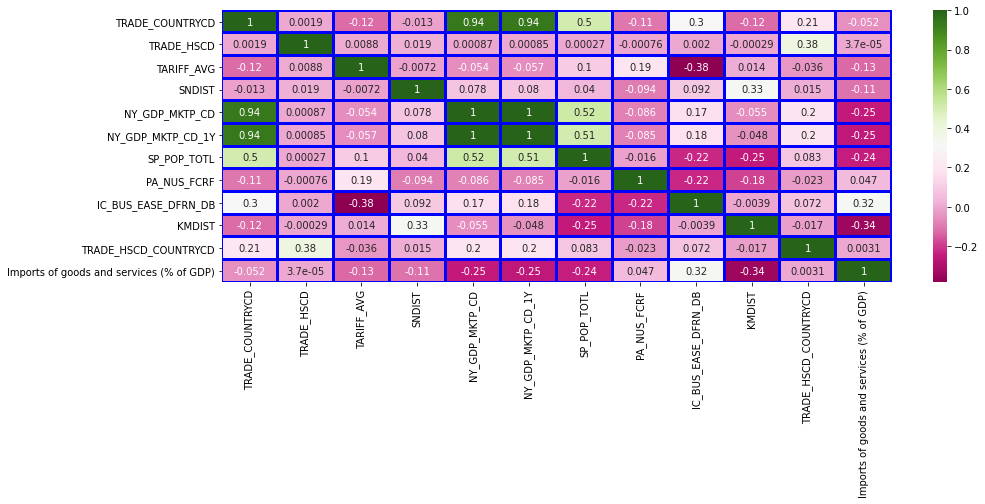

In [37]:
#다중 공선성 문제 어떻게 할지 고민...
plt.figure(figsize=(15,5))

# correlation table
corr_train = df.corr()


num = 10
col = corr_train.index
coeff = np.corrcoef(df[col].values.T)

# heatmap
heatmp = sns.heatmap(coeff, 
                     annot = True, 
                     xticklabels = col.values, yticklabels = col.values, 
                     linewidth=2,cmap='PiYG', linecolor='blue')

In [38]:
#NY_GDP_MKTP_CD와 상관계수가 1인 NY_GDP_MKTP_CD_1Y 제거
df['Economic_growth'] = ((df['NY_GDP_MKTP_CD'] - df['NY_GDP_MKTP_CD_1Y']) / df['NY_GDP_MKTP_CD_1Y'])*100
df.drop(['NY_GDP_MKTP_CD_1Y'], axis=1, inplace=True)
df.drop(['NY_GDP_MKTP_CD'], axis=1, inplace=True)

In [39]:
df

,HSCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,Imports of goods and services (% of GDP),Economic_growth
0,190590,Algeria,46052990973,1.948099e+10,30.0,3878.238437,41389198.0,110.973017,46.109810,9954.009766,3.416326e+06,32.689129,6.355410
1,190590,Australia,228441691195,1.948099e+10,0.0,12203.155980,24601860.0,1.304758,80.223690,8329.652344,4.387470e+08,20.612970,9.955063
2,190590,Austria,166475020975,1.948099e+10,0.0,4403.247293,8797566.0,1.933635,78.856460,8289.029297,4.532064e+08,50.890523,5.477994
3,190590,Belgium,406412223480,1.948099e+10,0.0,3980.375563,11375158.0,2.562512,72.409200,8722.114258,7.065245e+08,82.143426,5.666646
4,190590,Brazil,150749493921,1.948099e+10,18.0,9644.206941,207833831.0,3.191389,55.382403,18364.505860,3.132965e+07,11.800766,14.876140
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42373,852852,United Arab Emirates,254510973245,2.092602e+10,0.0,5404.902374,9630959.0,3.672500,79.300360,6909.236328,1.962898e+08,66.680651,9.494039
42374,852852,Turkey,234394880098,2.092602e+10,0.0,3810.711560,82319724.0,1.903768,70.914500,7967.700684,1.115959e+08,31.342544,-9.383914
42375,852852,Egypt,94326188483,2.092602e+10,0.0,4064.977456,98423595.0,6.870325,55.797630,8497.368164,3.436343e+07,29.366296,5.930125
42376,852852,United Kingdom,723877103929,2.092602e+10,0.0,4402.897106,66460344.0,0.639661,83.215350,8875.389648,1.238732e+09,32.080053,7.292642


In [40]:
numeric = df.dtypes[df.dtypes != "object"].index

skewness = df[numeric].apply(lambda x : x.skew()).sort_values(ascending=False)

sk_df = pd.DataFrame(skewness,columns=['skewness'])
sk_df['skw'] = abs(sk_df)
sk_df.sort_values('skw',ascending=False).drop('skw',axis=1)

,skewness
TRADE_HSCD_COUNTRYCD,30.100387
TARIFF_AVG,16.524691
TRADE_HSCD,6.440118
SP_POP_TOTL,3.897122
PA_NUS_FCRF,3.684223
TRADE_COUNTRYCD,2.924412
Imports of goods and services (% of GDP),2.546442
Economic_growth,-1.875440
SNDIST,0.918253
IC_BUS_EASE_DFRN_DB,-0.698085


In [41]:
#skew 값이 0.5 보다 큰 것들은...변환을 하려고 함... log(x+1)로 변환
#Economic_growth는 0보다 작은 값이 있어서 변환 안함
#IC_BUS_EASE_DFRN_DB(0~100점) 빼고
df['TRADE_COUNTRYCD'] = np.log1p(df['TRADE_COUNTRYCD'])
df['TRADE_HSCD'] = np.log1p(df['TRADE_HSCD'])
df['TARIFF_AVG'] = np.log1p(df['TARIFF_AVG'])
df['SNDIST'] = np.log1p(df['SNDIST'])
df['SP_POP_TOTL'] = np.log1p(df['SP_POP_TOTL'])
df['PA_NUS_FCRF'] = np.log1p(df['PA_NUS_FCRF'])
df['KMDIST'] = np.log1p(df['KMDIST'])
df['TRADE_HSCD_COUNTRYCD'] = np.log1p(df['TRADE_HSCD_COUNTRYCD'])
df['Imports of goods and services (% of GDP)'] = np.log1p(df['Imports of goods and services (% of GDP)'])

In [42]:
df.describe()

,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,Imports of goods and services (% of GDP),Economic_growth
count,42378.000000,42378.000000,42378.000000,42378.000000,42378.000000,42378.000000,42378.000000,42378.000000,42378.000000,42378.000000,42378.000000
mean,25.896166,22.472851,0.884097,8.688484,17.475183,3.280818,71.030205,8.811397,17.485701,3.628708,6.787198
std,1.312019,1.289576,1.062173,0.383340,1.415261,2.764936,10.438736,0.654729,2.064213,0.557285,6.480881
min,22.190519,19.311375,0.000000,6.965442,14.951348,0.249656,42.671390,6.863439,6.638568,2.549505,-29.090219
25%,25.052726,21.701623,0.000000,8.378809,16.251494,1.270466,64.528933,8.453970,16.202963,3.316830,4.584649
50%,26.124749,22.363229,0.262364,8.635461,17.452432,2.173984,73.429480,9.019551,17.571342,3.496908,7.284119
75%,26.832681,23.259295,1.791759,8.979966,18.365133,4.621943,78.706940,9.205831,18.841262,3.973660,9.578083
max,28.597856,26.899318,6.246107,9.636567,21.054532,10.411127,87.166330,9.818811,25.570841,5.244779,23.293816


In [43]:
df

,HSCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,Imports of goods and services (% of GDP),Economic_growth
0,190590,Algeria,24.553059,23.692705,3.433987,8.263394,17.538531,4.718258,46.109810,9.205831,15.044077,3.517175,6.355410
1,190590,Australia,26.154547,23.692705,0.000000,9.409532,17.018333,0.834976,80.223690,9.027697,19.899434,3.073294,9.955063
2,190590,Austria,25.838111,23.692705,0.000000,8.390325,15.989986,1.076242,78.856460,9.022809,19.931858,3.949136,5.477994
3,190590,Belgium,26.730634,23.692705,0.000000,8.289383,16.246943,1.270466,72.409200,9.073732,20.375868,4.420567,5.666646
4,190590,Brazil,25.738885,23.692705,2.944439,9.174216,19.152249,1.433032,55.382403,9.818230,17.260075,2.549505,14.876140
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42373,852852,United Arab Emirates,26.262610,23.764259,0.000000,8.595247,16.080493,1.541694,79.300360,8.840759,19.095103,4.214800,9.494039
42374,852852,Turkey,26.180273,23.764259,0.000000,8.245834,18.226121,1.066009,70.914500,8.983277,18.530395,3.476384,-9.383914
42375,852852,Egypt,25.270025,23.764259,0.000000,8.310409,18.404791,2.063099,55.797630,9.047629,17.352504,3.413333,5.930125
42376,852852,United Kingdom,27.307887,23.764259,0.000000,8.390245,18.012116,0.494489,83.215350,9.091150,20.937354,3.498930,7.292642


In [44]:
df = pd.get_dummies(df)
print(df.shape)

(42378, 554)


In [45]:
df

,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,Imports of goods and services (% of GDP),Economic_growth,HSCD_190219,HSCD_190230,HSCD_190590,HSCD_210390,HSCD_210690,HSCD_271019,HSCD_292910,HSCD_300490,HSCD_300510,HSCD_300590,HSCD_300610,HSCD_300640,HSCD_320890,HSCD_321511,HSCD_321519,HSCD_321590,HSCD_330410,HSCD_330420,HSCD_330430,HSCD_330491,HSCD_330499,HSCD_330510,HSCD_330590,HSCD_330790,HSCD_340220,HSCD_340290,HSCD_340319,HSCD_340700,HSCD_350610,...,COUNTRYNM_Belgium,COUNTRYNM_Brazil,COUNTRYNM_Canada,COUNTRYNM_Chile,COUNTRYNM_China,"COUNTRYNM_China, Hong Kong SAR",COUNTRYNM_Czechia,COUNTRYNM_Egypt,COUNTRYNM_France,COUNTRYNM_Germany,COUNTRYNM_Guatemala,COUNTRYNM_India,COUNTRYNM_Indonesia,COUNTRYNM_Iran,COUNTRYNM_Italy,COUNTRYNM_Japan,COUNTRYNM_Kazakhstan,COUNTRYNM_Kuwait,COUNTRYNM_Malaysia,COUNTRYNM_Mexico,COUNTRYNM_Mongolia,COUNTRYNM_Myanmar,COUNTRYNM_Netherlands,COUNTRYNM_New Zealand,COUNTRYNM_Norway,COUNTRYNM_Peru,COUNTRYNM_Philippines,COUNTRYNM_Poland,COUNTRYNM_Russian Federation,COUNTRYNM_Saudi Arabia,COUNTRYNM_Singapore,COUNTRYNM_South Africa,COUNTRYNM_Spain,COUNTRYNM_Sri Lanka,COUNTRYNM_Switzerland,COUNTRYNM_Turkey,COUNTRYNM_USA,COUNTRYNM_United Arab Emirates,COUNTRYNM_United Kingdom,COUNTRYNM_Viet Nam
0,24.553059,23.692705,3.433987,8.263394,17.538531,4.718258,46.109810,9.205831,15.044077,3.517175,6.355410,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,26.154547,23.692705,0.000000,9.409532,17.018333,0.834976,80.223690,9.027697,19.899434,3.073294,9.955063,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,25.838111,23.692705,0.000000,8.390325,15.989986,1.076242,78.856460,9.022809,19.931858,3.949136,5.477994,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,26.730634,23.692705,0.000000,8.289383,16.246943,1.270466,72.409200,9.073732,20.375868,4.420567,5.666646,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,25.738885,23.692705,2.944439,9.174216,19.152249,1.433032,55.382403,9.818230,17.260075,2.549505,14.876140,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42373,26.262610,23.764259,0.000000,8.595247,16.080493,1.541694,79.300360,8.840759,19.095103,4.214800,9.494039,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
42374,26.180273,23.764259,0.000000,8.245834,18.226121,1.066009,70.914500,8.983277,18.530395,3.476384,-9.383914,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
42375,25.270025,23.764259,0.000000,8.310409,18.404791,2.063099,55.797630,9.047629,17.352504,3.413333,5.930125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42376,27.307887,23.764259,0.000000,8.390245,18.012116,0.494489,83.215350,9.091150,20.937354,3.498930,7.292642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Train/Test 분리

In [46]:
X_train = df.iloc[:train_df.shape[0],:]
X_test = df.iloc[train_df.shape[0]:, :]

In [47]:
print("training shape:{}, test shape:{}".format(X_train.shape,X_test.shape))

training shape:(21189, 554), test shape:(21189, 554)


## 스케일링

In [48]:
X_test

,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,Imports of goods and services (% of GDP),Economic_growth,HSCD_190219,HSCD_190230,HSCD_190590,HSCD_210390,HSCD_210690,HSCD_271019,HSCD_292910,HSCD_300490,HSCD_300510,HSCD_300590,HSCD_300610,HSCD_300640,HSCD_320890,HSCD_321511,HSCD_321519,HSCD_321590,HSCD_330410,HSCD_330420,HSCD_330430,HSCD_330491,HSCD_330499,HSCD_330510,HSCD_330590,HSCD_330790,HSCD_340220,HSCD_340290,HSCD_340319,HSCD_340700,HSCD_350610,...,COUNTRYNM_Belgium,COUNTRYNM_Brazil,COUNTRYNM_Canada,COUNTRYNM_Chile,COUNTRYNM_China,"COUNTRYNM_China, Hong Kong SAR",COUNTRYNM_Czechia,COUNTRYNM_Egypt,COUNTRYNM_France,COUNTRYNM_Germany,COUNTRYNM_Guatemala,COUNTRYNM_India,COUNTRYNM_Indonesia,COUNTRYNM_Iran,COUNTRYNM_Italy,COUNTRYNM_Japan,COUNTRYNM_Kazakhstan,COUNTRYNM_Kuwait,COUNTRYNM_Malaysia,COUNTRYNM_Mexico,COUNTRYNM_Mongolia,COUNTRYNM_Myanmar,COUNTRYNM_Netherlands,COUNTRYNM_New Zealand,COUNTRYNM_Norway,COUNTRYNM_Peru,COUNTRYNM_Philippines,COUNTRYNM_Poland,COUNTRYNM_Russian Federation,COUNTRYNM_Saudi Arabia,COUNTRYNM_Singapore,COUNTRYNM_South Africa,COUNTRYNM_Spain,COUNTRYNM_Sri Lanka,COUNTRYNM_Switzerland,COUNTRYNM_Turkey,COUNTRYNM_USA,COUNTRYNM_United Arab Emirates,COUNTRYNM_United Kingdom,COUNTRYNM_Viet Nam
21189,24.465594,23.824917,3.332205,8.225783,17.558604,4.621943,46.22686,9.205831,15.730814,3.499889,3.080863,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21190,26.205664,23.824917,0.788457,9.388362,17.033694,0.710910,80.76007,9.027697,19.994617,3.110878,7.801203,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21191,25.954189,23.824917,1.335001,8.295554,15.994856,0.879319,78.70694,9.022809,20.029970,3.978183,9.073240,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21192,26.857628,23.824917,1.335001,8.412451,16.251494,1.023412,72.18146,9.073732,20.460733,4.433899,8.163210,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21193,25.945189,23.824917,2.895912,9.212016,19.160088,1.149334,55.80145,9.818230,17.524616,2.724003,-8.597336,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42373,26.262610,23.764259,0.000000,8.595247,16.080493,1.541694,79.30036,8.840759,19.095103,4.214800,9.494039,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
42374,26.180273,23.764259,0.000000,8.245834,18.226121,1.066009,70.91450,8.983277,18.530395,3.476384,-9.383914,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
42375,25.270025,23.764259,0.000000,8.310409,18.404791,2.063099,55.79763,9.047629,17.352504,3.413333,5.930125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42376,27.307887,23.764259,0.000000,8.390245,18.012116,0.494489,83.21535,9.091150,20.937354,3.498930,7.292642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [49]:
X_train.describe()

,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,Imports of goods and services (% of GDP),Economic_growth,HSCD_190219,HSCD_190230,HSCD_190590,HSCD_210390,HSCD_210690,HSCD_271019,HSCD_292910,HSCD_300490,HSCD_300510,HSCD_300590,HSCD_300610,HSCD_300640,HSCD_320890,HSCD_321511,HSCD_321519,HSCD_321590,HSCD_330410,HSCD_330420,HSCD_330430,HSCD_330491,HSCD_330499,HSCD_330510,HSCD_330590,HSCD_330790,HSCD_340220,HSCD_340290,HSCD_340319,HSCD_340700,HSCD_350610,...,COUNTRYNM_Belgium,COUNTRYNM_Brazil,COUNTRYNM_Canada,COUNTRYNM_Chile,COUNTRYNM_China,"COUNTRYNM_China, Hong Kong SAR",COUNTRYNM_Czechia,COUNTRYNM_Egypt,COUNTRYNM_France,COUNTRYNM_Germany,COUNTRYNM_Guatemala,COUNTRYNM_India,COUNTRYNM_Indonesia,COUNTRYNM_Iran,COUNTRYNM_Italy,COUNTRYNM_Japan,COUNTRYNM_Kazakhstan,COUNTRYNM_Kuwait,COUNTRYNM_Malaysia,COUNTRYNM_Mexico,COUNTRYNM_Mongolia,COUNTRYNM_Myanmar,COUNTRYNM_Netherlands,COUNTRYNM_New Zealand,COUNTRYNM_Norway,COUNTRYNM_Peru,COUNTRYNM_Philippines,COUNTRYNM_Poland,COUNTRYNM_Russian Federation,COUNTRYNM_Saudi Arabia,COUNTRYNM_Singapore,COUNTRYNM_South Africa,COUNTRYNM_Spain,COUNTRYNM_Sri Lanka,COUNTRYNM_Switzerland,COUNTRYNM_Turkey,COUNTRYNM_USA,COUNTRYNM_United Arab Emirates,COUNTRYNM_United Kingdom,COUNTRYNM_Viet Nam
count,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,...,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000,21189.000000
mean,25.843515,22.418015,0.695796,8.684585,17.470408,3.394428,70.723435,8.811397,17.430200,3.613859,6.976658,0.002029,0.001982,0.002029,0.002029,0.002029,0.002029,0.001935,0.002029,0.001982,0.002029,0.001982,0.002029,0.001982,0.002029,0.002029,0.002029,0.001982,0.001982,0.001935,0.001935,0.002029,0.001982,0.001982,0.001982,0.001982,0.002029,0.002029,0.001982,0.002029,...,0.023267,0.023550,0.023597,0.023597,0.023597,0.023550,0.023550,0.023550,0.023550,0.023597,0.022936,0.023597,0.023597,0.020954,0.023550,0.023597,0.023408,0.023172,0.023550,0.023550,0.023031,0.023172,0.023597,0.023597,0.023314,0.023503,0.023550,0.023550,0.023597,0.023550,0.023597,0.023597,0.023503,0.019822,0.023503,0.023597,0.023597,0.023597,0.023597,0.023597
std,1.304485,1.288119,1.065006,0.382335,1.415829,2.807845,10.562132,0.654737,2.092805,0.566384,7.599939,0.045004,0.044478,0.045004,0.045004,0.045004,0.045004,0.043947,0.045004,0.044478,0.045004,0.044478,0.045004,0.044478,0.045004,0.045004,0.045004,0.044478,0.044478,0.043947,0.043947,0.045004,0.044478,0.044478,0.044478,0.044478,0.045004,0.045004,0.044478,0.045004,...,0.150753,0.151646,0.151794,0.151794,0.151794,0.151646,0.151646,0.151646,0.151646,0.151794,0.149704,0.151794,0.151794,0.143235,0.151646,0.151794,0.151200,0.150454,0.151646,0.151646,0.150005,0.150454,0.151794,0.151794,0.150902,0.151497,0.151646,0.151646,0.151794,0.151646,0.151794,0.151794,0.151497,0.139390,0.151497,0.151794,0.151794,0.151794,0.151794,0.151794
min,22.190519,19.311375,0.000000,6.965442,14.951348,0.264938,42.671390,6.863439,6.638568,2.549505,-29.090219,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train, columns = df.columns)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = df.columns)

## DNN

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, target_df, test_size=0.2)

In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam
from keras.losses import huber

In [53]:
# 모델 구조 정의하기
model=keras.models.Sequential([
    
    keras.layers.Dense(1024, input_dim = x_train.shape[1], kernel_initializer="he_normal"), 
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    
    keras.layers.Dense(512, kernel_initializer="he_normal"),  
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, kernel_initializer="he_normal"),  
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(units=256, kernel_initializer="he_normal"), 
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(units=256, kernel_initializer="he_normal"), 
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.01),
    keras.layers.Dense(units=128, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(), 
    keras.layers.Dropout(0.05),
    keras.layers.Dense(units=1, activation="linear")])

optimizer = Adam(learning_rate=0.005, decay=5e-4)
# 모델 구축하기
model.compile(
        loss='mse',         # mean_squared_error(평균제곱오차)의 alias
        optimizer=optimizer,   # 최적화 기법 중 하나
        metrics=['mape'])    # 실험 후 관찰하고 싶은 metric 들을 나열함.

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              568320    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2

In [55]:
'''
20개에 한 번씩 업데이터 실행
0:미출력, 1:진행상황출력, 2:에포크당 출력
'''
checkpoint_cb = keras.callbacks.ModelCheckpoint('dnn_kotra.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
hist = model.fit(
    x_train, y_train,
    batch_size=20,    
    epochs=500,       
    validation_data=(x_test, y_test),  
    callbacks=[checkpoint_cb, early_stopping_cb],  
    verbose=1) 

# 테스트 데이터 입력
scores = model.evaluate(x_test, y_test)
print('test_loss: ', scores[0])
print('test_mape: ', scores[1])

Epoch 1/500
848/848 [==============================] - 10s 10ms/step - loss: 8.9561 - mape: 20.4593 - val_loss: 4.5807 - val_mape: 14.9125
Epoch 2/500
848/848 [==============================] - 8s 9ms/step - loss: 5.0962 - mape: 16.5988 - val_loss: 3.8801 - val_mape: 14.3661
Epoch 3/500
848/848 [==============================] - 8s 9ms/step - loss: 4.4563 - mape: 15.6146 - val_loss: 3.7268 - val_mape: 13.6612
Epoch 4/500
848/848 [==============================] - 8s 9ms/step - loss: 4.1637 - mape: 15.0840 - val_loss: 3.1901 - val_mape: 12.6498
Epoch 5/500
848/848 [==============================] - 8s 9ms/step - loss: 3.8716 - mape: 14.5738 - val_loss: 3.2053 - val_mape: 12.6572
Epoch 6/500
848/848 [==============================] - 8s 9ms/step - loss: 3.7990 - mape: 14.4332 - val_loss: 3.9714 - val_mape: 13.6015
Epoch 7/500
848/848 [==============================] - 8s 9ms/step - loss: 3.6963 - mape: 14.2545 - val_loss: 3.2655 - val_mape: 13.1549
Epoch 8/500
848/848 [==================

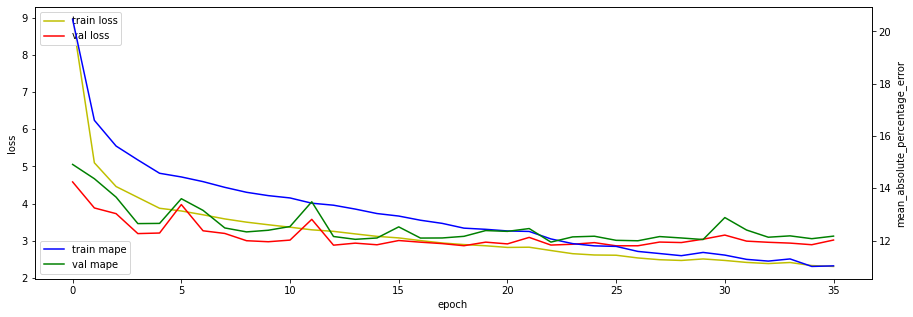

In [56]:
fig, loss_ax = plt.subplots(figsize=(15, 5))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')   # 훈련데이터의 loss (즉, mse)
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss') # 검증데이터의 loss (즉, mse)

acc_ax.plot(hist.history['mape'], 'b', label='train mape')   # 훈련데이터의 mae
acc_ax.plot(hist.history['val_mape'], 'g', label='val mape') # 검증데이터의 mae

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('mean_absolute_percentage_error')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [57]:
scores

[2.86114239692688, 12.009997367858887]

## 예측용 데이터셋 predict

In [58]:
X_test

,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,Imports of goods and services (% of GDP),Economic_growth,HSCD_190219,HSCD_190230,HSCD_190590,HSCD_210390,HSCD_210690,HSCD_271019,HSCD_292910,HSCD_300490,HSCD_300510,HSCD_300590,HSCD_300610,HSCD_300640,HSCD_320890,HSCD_321511,HSCD_321519,HSCD_321590,HSCD_330410,HSCD_330420,HSCD_330430,HSCD_330491,HSCD_330499,HSCD_330510,HSCD_330590,HSCD_330790,HSCD_340220,HSCD_340290,HSCD_340319,HSCD_340700,HSCD_350610,...,COUNTRYNM_Belgium,COUNTRYNM_Brazil,COUNTRYNM_Canada,COUNTRYNM_Chile,COUNTRYNM_China,"COUNTRYNM_China, Hong Kong SAR",COUNTRYNM_Czechia,COUNTRYNM_Egypt,COUNTRYNM_France,COUNTRYNM_Germany,COUNTRYNM_Guatemala,COUNTRYNM_India,COUNTRYNM_Indonesia,COUNTRYNM_Iran,COUNTRYNM_Italy,COUNTRYNM_Japan,COUNTRYNM_Kazakhstan,COUNTRYNM_Kuwait,COUNTRYNM_Malaysia,COUNTRYNM_Mexico,COUNTRYNM_Mongolia,COUNTRYNM_Myanmar,COUNTRYNM_Netherlands,COUNTRYNM_New Zealand,COUNTRYNM_Norway,COUNTRYNM_Peru,COUNTRYNM_Philippines,COUNTRYNM_Poland,COUNTRYNM_Russian Federation,COUNTRYNM_Saudi Arabia,COUNTRYNM_Singapore,COUNTRYNM_South Africa,COUNTRYNM_Spain,COUNTRYNM_Sri Lanka,COUNTRYNM_Switzerland,COUNTRYNM_Turkey,COUNTRYNM_USA,COUNTRYNM_United Arab Emirates,COUNTRYNM_United Kingdom,COUNTRYNM_Viet Nam
0,-1.056321,1.092240,2.475546,-1.200028,0.062294,0.437184,-2.319338,0.602446,-0.812033,-0.201228,-0.512621,-0.045094,-0.044566,22.175830,-0.045094,-0.045094,-0.045094,-0.044031,-0.045094,-0.044566,-0.045094,-0.044566,-0.045094,-0.044566,-0.045094,-0.045094,-0.045094,-0.044566,-0.044566,-0.044031,-0.044031,-0.045094,-0.044566,-0.044566,-0.044566,-0.044566,-0.045094,-0.045094,-0.044566,-0.045094,...,-0.154341,-0.155299,-0.155459,-0.155459,-0.155459,-0.155299,-0.155299,-0.155299,-0.155299,-0.155459,-0.153215,-0.155459,-0.155459,-0.146297,-0.155299,-0.155459,-0.154821,-0.15402,-0.155299,-0.155299,-0.153537,-0.15402,-0.155459,-0.155459,-0.154501,-0.15514,-0.155299,-0.155299,-0.155459,-0.155299,-0.155459,-0.155459,-0.15514,-0.142206,-0.15514,-0.155459,-0.155459,-0.155459,-0.155459,-0.155459
1,0.277625,1.092240,0.087007,1.840775,-0.308459,-0.955744,0.950269,0.330370,1.225378,-0.888077,0.108496,-0.045094,-0.044566,22.175830,-0.045094,-0.045094,-0.045094,-0.044031,-0.045094,-0.044566,-0.045094,-0.044566,-0.045094,-0.044566,-0.045094,-0.045094,-0.045094,-0.044566,-0.044566,-0.044031,-0.044031,-0.045094,-0.044566,-0.044566,-0.044566,-0.044566,-0.045094,-0.045094,-0.044566,-0.045094,...,-0.154341,-0.155299,-0.155459,-0.155459,-0.155459,-0.155299,-0.155299,-0.155299,-0.155299,-0.155459,-0.153215,-0.155459,-0.155459,-0.146297,-0.155299,-0.155459,-0.154821,-0.15402,-0.155299,-0.155299,-0.153537,-0.15402,-0.155459,-0.155459,-0.154501,-0.15514,-0.155299,-0.155299,-0.155459,-0.155299,-0.155459,-0.155459,-0.15514,-0.142206,-0.15514,-0.155459,-0.155459,-0.155459,-0.155459,-0.155459
2,0.084842,1.092240,0.600203,-1.017539,-1.042207,-0.895765,0.755879,0.322904,1.242271,0.643260,0.275875,-0.045094,-0.044566,22.175830,-0.045094,-0.045094,-0.045094,-0.044031,-0.045094,-0.044566,-0.045094,-0.044566,-0.045094,-0.044566,-0.045094,-0.045094,-0.045094,-0.044566,-0.044566,-0.044031,-0.044031,-0.045094,-0.044566,-0.044566,-0.044566,-0.044566,-0.045094,-0.045094,-0.044566,-0.045094,...,-0.154341,-0.155299,-0.155459,-0.155459,-0.155459,-0.155299,-0.155299,-0.155299,-0.155299,-0.155459,-0.153215,-0.155459,-0.155459,-0.146297,-0.155299,-0.155459,-0.154821,-0.15402,-0.155299,-0.155299,-0.153537,-0.15402,-0.155459,-0.155459,-0.154501,-0.15514,-0.155299,-0.155299,-0.155459,-0.155299,-0.155459,-0.155459,-0.15514,-0.142206,-0.15514,-0.155459,-0.155459,-0.155459,-0.155459,-0.155459
3,0.777423,1.092240,0.600203,-0.711786,-0.860939,-0.844445,0.138046,0.400682,1.448107,1.447885,0.156130,-0.045094,-0.044566,22.175830,-0.045094,-0.045094,-0.045094,-0.044031,-0.045094,-0.044566,-0.045094,-0.044566,-0.045094,-0.044566,-0.045094,-0.045094,-0.045094,-0.044566,-0.044566,-0.044031,-0.044031,-0.045094,-0.

In [59]:
pred = model.predict(X_test)

In [60]:
pred.shape

(21189, 1)

In [61]:
pred

array([[10.688678],
       [14.697009],
       [12.005606],
       ...,
       [13.43026 ],
       [15.707731],
       [19.317562]], dtype=float32)

In [62]:
#log1p 원상태로 복구
final = np.expm1(pred)
final

array([[4.3855480e+04],
       [2.4145142e+06],
       [1.6366870e+05],
       ...,
       [6.8027900e+05],
       [6.6340835e+06],
       [2.4519445e+08]], dtype=float32)

In [63]:
final = pd.DataFrame(final, columns=['KR_TRADE_HSCD_COUNTRYCD'])
final

,KR_TRADE_HSCD_COUNTRYCD
0,4.385548e+04
1,2.414514e+06
2,1.636687e+05
3,2.782887e+05
4,2.588842e+05
...,...
21184,3.669468e+06
21185,1.744373e+06
21186,6.802790e+05
21187,6.634084e+06


In [64]:
final.to_csv('/content/drive/My Drive/Colab Notebooks/kotra/kotra7.csv')

# 수입 예측 데이터 시각화

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('빅데이터분석_이현태.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21189 entries, 0 to 21188
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UNC_YEAR                 21189 non-null  int64  
 1   HSCD                     21189 non-null  int64  
 2   COUNTRYCD                21189 non-null  int64  
 3   COUNTRYNM                21189 non-null  object 
 4   TRADE_COUNTRYCD          21189 non-null  int64  
 5   TRADE_HSCD               21189 non-null  int64  
 6   TARIFF_AVG               20564 non-null  float64
 7   SNDIST                   21186 non-null  float64
 8   NY_GDP_MKTP_CD           21189 non-null  int64  
 9   NY_GDP_MKTP_CD_1Y        21189 non-null  int64  
 10  SP_POP_TOTL              21189 non-null  float64
 11  PA_NUS_FCRF              17701 non-null  float64
 12  IC_BUS_EASE_DFRN_DB      21189 non-null  float64
 13  KMDIST                   21189 non-null  float64
 14  TRADE_HSCD_COUNTRYCD  

In [4]:
data.head()

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
0,2018,190590,12,Algeria,42196119729,22234640370,27.0,3735.047389,175405660377,170163165961,42228429.0,100.691433,46.22686,9954.009766,6788998.0,43855.48
1,2018,190590,36,Australia,240422685574,22234640370,1.2,11947.511360,1432881172002,1329188475752,24982688.0,1.035843,80.76007,8329.652344,482560567.0,2414514.20
2,2018,190590,40,Austria,186965232670,22234640370,2.8,4005.020029,455094861902,417237869116,8840521.0,NaN,78.70694,8289.029297,499925873.0,163668.70
3,2018,190590,56,Belgium,461444842911,22234640370,2.8,4501.782826,543734366831,502698069367,11427054.0,NaN,72.18146,8722.114258,769101370.0,278288.72
4,2018,190590,76,Brazil,185290138433,22234640370,17.1,10015.769070,1885482534238,2062831045936,209469333.0,2.156089,55.80145,18364.505860,40817292.0,258884.19


In [5]:
sns.set(style='whitegrid')

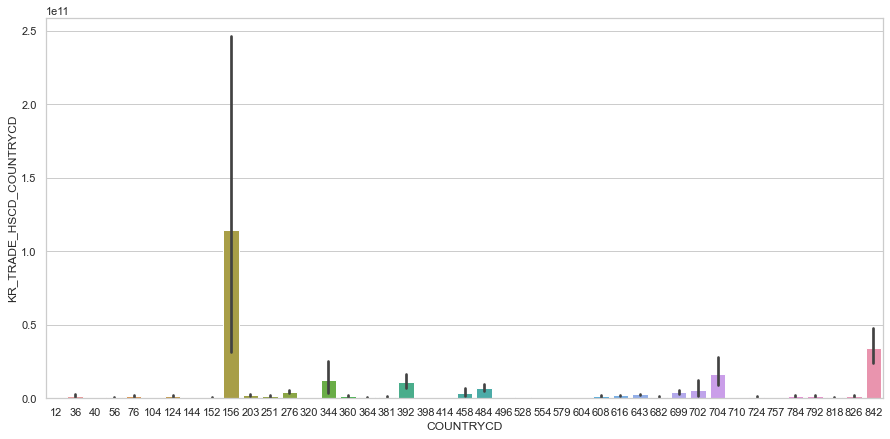

In [6]:
#2019년에는 중국(156), 미국(842), 베트남(704) 순으로 총 수입액이 많을 것이라고 예측
plt.figure(figsize=(15, 7))
sns.barplot(x='COUNTRYCD', y='KR_TRADE_HSCD_COUNTRYCD', data=data, estimator=np.sum)
plt.show()

In [7]:
#156
China = data[data['COUNTRYNM'] == "China"]

China['KR_TRADE_HSCD_COUNTRYCD'].sum()

114801371477.49399

In [8]:
#842
USA = data[data['COUNTRYNM'] == "USA"]
USA['KR_TRADE_HSCD_COUNTRYCD'].sum()

34477436566.0

In [9]:
#704
Vietnam = data[data['COUNTRYNM'] == "Viet Nam"]
Vietnam['KR_TRADE_HSCD_COUNTRYCD'].sum()

16711445287.0357

In [10]:
#344
HK = data[data['COUNTRYNM'] == "China, Hong Kong SAR"]
HK['KR_TRADE_HSCD_COUNTRYCD'].sum()

12700555804.0168

In [11]:
#392
Japan = data[data['COUNTRYNM'] == "Japan"]
Japan['KR_TRADE_HSCD_COUNTRYCD'].sum()

11222876415.447

In [12]:
China['KR_TRADE_HSCD_COUNTRYCD'].max()

54744494000.0

In [13]:
#중국이 한국에 제일 많이 수입하는 품목코드
data.iat[China['KR_TRADE_HSCD_COUNTRYCD'].idxmax(),1]

854232

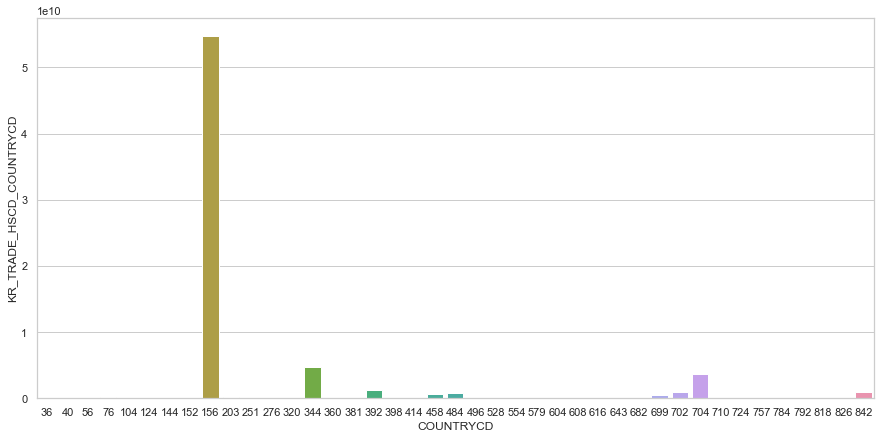

In [17]:
#중국이 한국에 제일 많이 수입하는 품목코드
plt.figure(figsize=(15, 7))
sns.barplot(x='COUNTRYCD', y='KR_TRADE_HSCD_COUNTRYCD', data=data[data['HSCD'] == 854232])
plt.show()

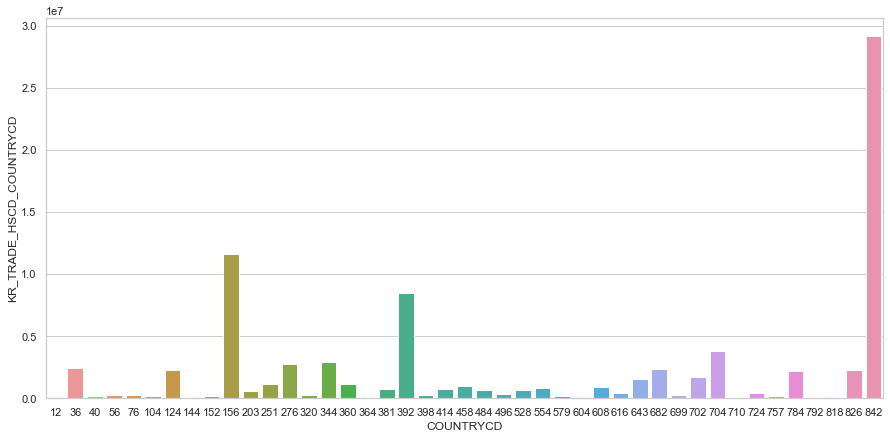

In [16]:
#특정 품목코드를 어느 나라가 제일 한국에 수입을 많이 할지 예측할 수 있음
#품목코드가 190590인 품목은 미국(국가코드 842)이 제일 많이 한국에 수입할 것이라고 예측
plt.figure(figsize=(15, 7))
sns.barplot(x='COUNTRYCD', y='KR_TRADE_HSCD_COUNTRYCD', data=data[data['HSCD'] == 190590])
plt.show()